# Heart Disease Prediction Project

---
**Team Members:**
- Aditya Kotkar (PRN: 202301040009)
- Krishna Tolani (PRN: 202301040073)
- Rishi Waghmare (PRN: 202301040014)

**Institution:** MIT Academy of Engineering, Alandi, Pune  
**Academic Year:** 2025-2026

## 🎯 Project Aim

The goal of this project is to build and evaluate a series of machine learning models to predict the presence of heart disease in a patient based on a set of medical attributes.

We will start with base classification models, then use clustering to engineer a new feature, and finally implement advanced ensemble models to improve predictive accuracy. The performance of all models will be rigorously compared to find the most effective solution.

## Step 1: Setup and Data Loading

First, we'll set up our environment by importing the necessary libraries for data handling (`pandas`, `numpy`), visualization (`matplotlib`, `seaborn`), and machine learning (`sklearn`).

We will then load our local `heart.csv` dataset.

In [1]:
# Import foundational libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for modeling and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# Set plot style
sns.set_style('whitegrid')

# Load the local dataset
try:
    df = pd.read_csv('heart.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("File 'heart.csv' not found. Please make sure it's in the same directory as this notebook.")

# Display the first 5 rows
df.head()

Dataset loaded successfully!


,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,Target
0,63,1,typical,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2,reversable,1
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0,normal,0


## Step 2: Exploratory Data Analysis (EDA)

Before building any models, we need to understand our data. This step involves checking for missing values, understanding the distribution of each feature, and analyzing the balance of our target variable (`target`).

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         303 non-null    int64  
 12  Thal       301 non-null    object 
 13  Target     303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB

--- Descriptive Statistics ---


,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.686469,0.458746
std,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.947661,0.499120
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000



--- Target Variable Distribution ---
Target
0    164
1    139
Name: count, dtype: int64


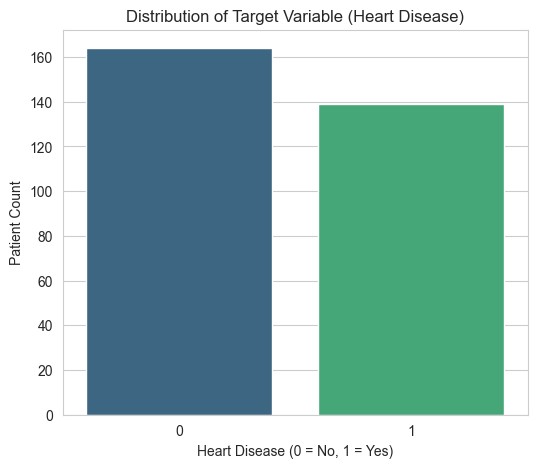

In [2]:
# Get a summary of the dataset (Dtypes, non-null counts)
print("--- Dataset Info ---")
df.info()

# Get a statistical summary of the numerical features
print("\n--- Descriptive Statistics ---")
display(df.describe())

# Check the distribution of the target variable
print("\n--- Target Variable Distribution ---")
# Corrected 'target' to 'Target'
print(df['Target'].value_counts())

# Visualize the target variable distribution
plt.figure(figsize=(6, 5))
sns.countplot(x='Target', data=df, palette='viridis', hue='Target', legend=False)
plt.title('Distribution of Target Variable (Heart Disease)')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Patient Count')
plt.show()

### 2.1 Data Cleaning and Feature Correlation

The EDA revealed two `object` type columns (`ChestPain`, `Thal`) and 2 missing values in the `Thal` column.

Our next step is to clean this data:
1.  Drop the rows with missing values.
2.  Convert the `object` columns into numerical ones using `pd.get_dummies` (one-hot encoding).

After cleaning, we'll create a correlation heatmap to visualize how each feature relates to the `Target` and to each other.

--- Processed DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 301 entries, 0 to 302
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   301 non-null    int64  
 1   Sex                   301 non-null    int64  
 2   RestBP                301 non-null    int64  
 3   Chol                  301 non-null    int64  
 4   Fbs                   301 non-null    int64  
 5   RestECG               301 non-null    int64  
 6   MaxHR                 301 non-null    int64  
 7   ExAng                 301 non-null    int64  
 8   Oldpeak               301 non-null    float64
 9   Slope                 301 non-null    int64  
 10  Ca                    301 non-null    int64  
 11  Target                301 non-null    int64  
 12  ChestPain_nonanginal  301 non-null    bool   
 13  ChestPain_nontypical  301 non-null    bool   
 14  ChestPain_typical     301 non-null    bool   


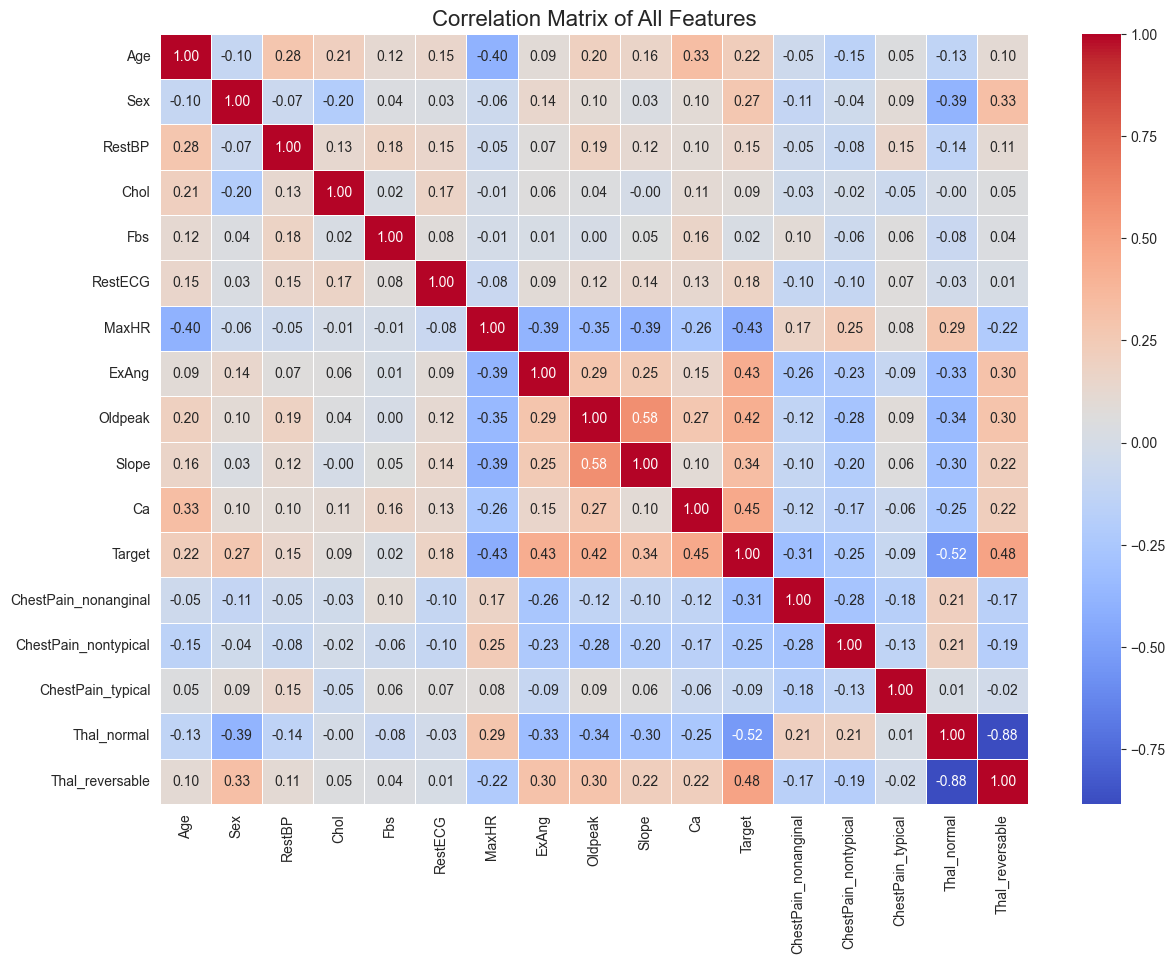

In [3]:
# 1. Data Cleaning
# Drop rows with any missing values (will drop the 2 rows with missing 'Thal')
df_clean = df.dropna()

# 2. One-hot encode the categorical columns
# We use drop_first=True to avoid the "dummy variable trap" (multicollinearity)
df_processed = pd.get_dummies(df_clean, columns=['ChestPain', 'Thal'], drop_first=True)

# Display the .info() of the processed dataframe to see the new columns
print("--- Processed DataFrame Info ---")
df_processed.info()

# 3. Correlation Heatmap
plt.figure(figsize=(14, 10))
correlation_matrix = df_processed.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of All Features', fontsize=16)
plt.show()

## Step 3: Feature Engineering with K-Means Clustering

Before we build our classification models, we can use clustering to create a new, powerful feature.

We will use **K-Means Clustering** on the primary medical attributes (`Age`, `RestBP`, `Chol`, `MaxHR`) to group patients into distinct profiles. This new "Patient_Profile" feature will be added to our dataset and may help our classification models detect more nuanced patterns.

We'll use the **Elbow Method** to find the optimal number of clusters (`k`).

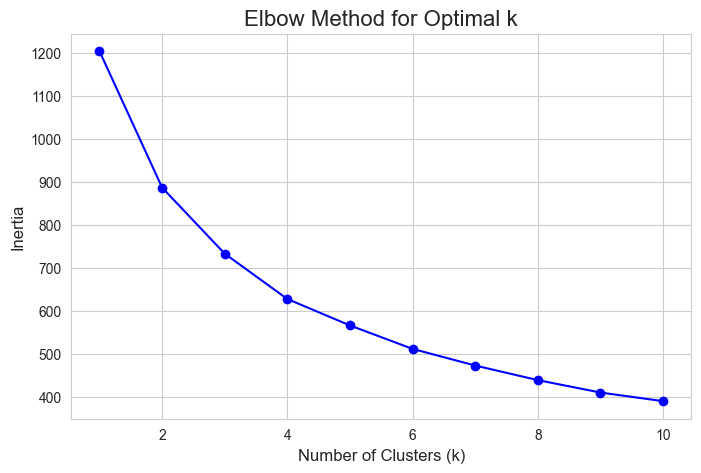


Successfully added 'Patient_Profile' feature with 3 clusters.


,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Target,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_normal,Thal_reversable,Patient_Profile
0,63,1,145,233,1,2,150,0,2.3,3,0,0,False,False,True,False,False,2
1,67,1,160,286,0,2,108,1,1.5,2,3,1,False,False,False,True,False,2
2,67,1,120,229,0,2,129,1,2.6,2,2,1,False,False,False,False,True,1
3,37,1,130,250,0,0,187,0,3.5,3,0,0,True,False,False,True,False,0
4,41,0,130,204,0,2,172,0,1.4,1,0,0,False,True,False,True,False,0


In [4]:
from sklearn.cluster import KMeans

# Select the features for clustering
X_cluster = df_processed[['Age', 'RestBP', 'Chol', 'MaxHR']]

# Standardize these features (K-Means is distance-based)
scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)

# --- Use the Elbow Method to find the optimal k ---
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method results
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-')
plt.title('Elbow Method for Optimal k', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.grid(True)
plt.show()

# --- Apply K-Means with the chosen k ---
# The elbow appears to be around k=3, so we'll use that.
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_cluster_scaled)

# Add the new cluster feature to our main processed dataframe
df_final = df_processed.copy()
df_final['Patient_Profile'] = cluster_labels

print(f"\nSuccessfully added 'Patient_Profile' feature with {optimal_k} clusters.")
df_final.head()

## Step 4: Data Splitting and Scaling

Our data is now fully processed and feature-engineered. Before we can train our models, we must:
1.  Define our final feature matrix (`X`) and target vector (`y`).
2.  Split the data into training and testing sets.
3.  Apply `StandardScaler` to our features to ensure all values are on a consistent scale, which improves the performance of many algorithms (like SVM, KNN, and Logistic Regression).

In [5]:
# 1. Define X and y
X = df_final.drop('Target', axis=1)
y = df_final['Target']

# 2. Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Data split and scaled successfully.")
print(f"X_train shape: {X_train_scaled.shape}")
print(f"X_test shape: {X_test_scaled.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data split and scaled successfully.
X_train shape: (240, 17)
X_test shape: (61, 17)
y_train shape: (240,)
y_test shape: (61,)


## Step 5: Train and Evaluate Base Classification Models

With our data split and scaled, we can now train our base models. We will build, train, and evaluate the following four classifiers:
1.  **K-Nearest Neighbors (KNN):** A simple algorithm that classifies data based on its "neighbors."
2.  **Support Vector Machine (SVM):** A powerful model that finds the optimal hyperplane to separate classes.
3.  **Decision Tree:** A tree-based model that makes decisions by splitting on features.
4.  **Logistic Regression:** A linear model used for classification, which will serve as our baseline.

We will train each on the `X_train_scaled` data and evaluate its performance on the `X_test_scaled` data.

In [6]:
# Create a dictionary to store our models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Support Vector Machine": SVC(kernel='rbf', probability=True, random_state=42) # probability=True is needed for stacking
}

# Create a dictionary to store the results
results = {}

print("--- Evaluating Base Models ---")

# Loop through each model, train it, and store the results
for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test_scaled)

    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store results
    results[name] = {'Accuracy': acc, 'F1-Score': f1}

    print(f"\nModel: {name}")
    print(f"  Accuracy: {acc:.4f}")
    print(f"  F1-Score: {f1:.4f}")

# Store the fitted models for later use in ensembles
base_models = list(models.items())

--- Evaluating Base Models ---

Model: Logistic Regression
  Accuracy: 0.8361
  F1-Score: 0.8214

Model: K-Nearest Neighbors
  Accuracy: 0.8689
  F1-Score: 0.8519

Model: Decision Tree
  Accuracy: 0.6393
  F1-Score: 0.6207

Model: Support Vector Machine
  Accuracy: 0.8361
  F1-Score: 0.8077


## Step 6: Train and Evaluate Ensemble Models

We have our baseline performance from the individual models. Now we'll implement three advanced ensemble techniques to see if we can improve accuracy and create a more robust predictor.

1.  **Voting Ensemble:** Combines the predictions from our base models (LR, KNN, and SVM) and predicts the class that gets the "majority vote." We'll exclude the low-performing Decision Tree.
2.  **AdaBoost Ensemble:** A boosting algorithm that learns from its mistakes by focusing on difficult-to-classify samples.
3.  **Stacking Ensemble:** A powerful technique that uses the predictions from our base models as new features to train a final "meta-classifier" (we'll use Logistic Regression for this).

In [7]:
# --- 1. Voting Ensemble ---
# We use the 'probability'-enabled SVM and our other top models
voting_clf = VotingClassifier(
    estimators=[
        ('lr', models['Logistic Regression']),
        ('knn', models['K-Nearest Neighbors']),
        ('svm', models['Support Vector Machine'])
    ],
    voting='soft' # 'soft' voting uses prediction probabilities and often performs better
)
voting_clf.fit(X_train_scaled, y_train)
y_pred_voting = voting_clf.predict(X_test_scaled)
acc_voting = accuracy_score(y_test, y_pred_voting)
f1_voting = f1_score(y_test, y_pred_voting)
results['Voting Ensemble'] = {'Accuracy': acc_voting, 'F1-Score': f1_voting}

print("--- Voting Ensemble ---")
print(f"  Accuracy: {acc_voting:.4f}")
print(f"  F1-Score: {f1_voting:.4f}")


# --- 2. AdaBoost Ensemble ---
# We use a Decision Tree as the base estimator, as is common with AdaBoost
ada_clf = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1, random_state=42),
    n_estimators=100,
    random_state=42
)
ada_clf.fit(X_train_scaled, y_train)
y_pred_ada = ada_clf.predict(X_test_scaled)
acc_ada = accuracy_score(y_test, y_pred_ada)
f1_ada = f1_score(y_test, y_pred_ada)
results['AdaBoost Ensemble'] = {'Accuracy': acc_ada, 'F1-Score': f1_ada}

print("\n--- AdaBoost Ensemble ---")
print(f"  Accuracy: {acc_ada:.4f}")
print(f"  F1-Score: {f1_ada:.4f}")


# --- 3. Stacking Ensemble ---
# Define the base models (estimators)
estimators = [
    ('lr', models['Logistic Regression']),
    ('knn', models['K-Nearest Neighbors']),
    ('svm', models['Support Vector Machine']),
    ('dt', models['Decision Tree'])
]
# Define the meta-classifier (we'll use Logistic Regression)
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(random_state=42),
    cv=5 # Use cross-validation inside the training
)
stacking_clf.fit(X_train_scaled, y_train)
y_pred_stacking = stacking_clf.predict(X_test_scaled)
acc_stacking = accuracy_score(y_test, y_pred_stacking)
f1_stacking = f1_score(y_test, y_pred_stacking)
results['Stacking Ensemble'] = {'Accuracy': acc_stacking, 'F1-Score': f1_stacking}

print("\n--- Stacking Ensemble ---")
print(f"  Accuracy: {acc_stacking:.4f}")
print(f"  F1-Score: {f1_stacking:.4f}")

--- Voting Ensemble ---
  Accuracy: 0.8525
  F1-Score: 0.8364

--- AdaBoost Ensemble ---
  Accuracy: 0.8852
  F1-Score: 0.8727

--- Stacking Ensemble ---
  Accuracy: 0.8689
  F1-Score: 0.8571


## Step 7: Final Model Comparison and Conclusion

We have now trained and evaluated a total of seven models: four base classifiers and three ensemble models. It's time to compare their performance side-by-side to draw our final conclusions.

We will create a summary DataFrame for all model metrics and visualize their F1-scores to identify the top-performing model.

--- Final Model Performance Comparison ---


,Accuracy,F1-Score
AdaBoost Ensemble,0.885246,0.872727
Stacking Ensemble,0.868852,0.857143
K-Nearest Neighbors,0.868852,0.851852
Voting Ensemble,0.852459,0.836364
Logistic Regression,0.836066,0.821429
Support Vector Machine,0.836066,0.807692
Decision Tree,0.639344,0.620690


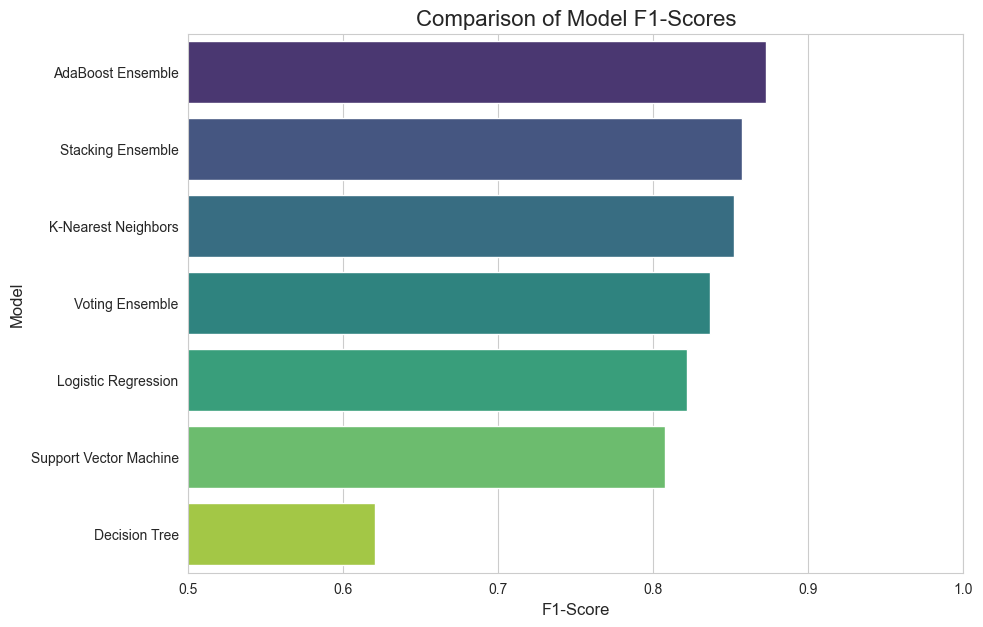


--- Confusion Matrix for Best Model (AdaBoost Ensemble) ---


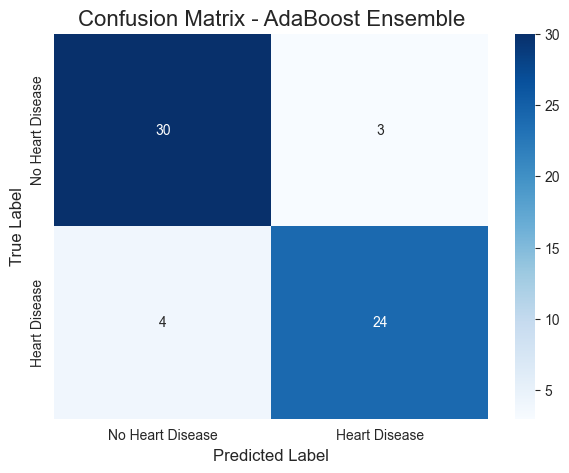

In [8]:
# Create a DataFrame from the results dictionary
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df = results_df.sort_values(by='F1-Score', ascending=False)

print("--- Final Model Performance Comparison ---")
display(results_df.style.highlight_max(subset=['Accuracy', 'F1-Score'], color='lightgreen'))

# --- Visualize Model Comparison ---
plt.figure(figsize=(10, 7))
sns.barplot(x=results_df['F1-Score'], y=results_df.index, palette='viridis', hue=results_df.index, legend=False)
plt.title('Comparison of Model F1-Scores', fontsize=16)
plt.xlabel('F1-Score', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.xlim(0.5, 1.0) # Start x-axis at 0.5 for better visibility
plt.show()

# --- Confusion Matrix for the Best Model ---
print("\n--- Confusion Matrix for Best Model (AdaBoost Ensemble) ---")
best_model = ada_clf
y_pred_best = best_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title('Confusion Matrix - AdaBoost Ensemble', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

## 🏆 Final Conclusion

This project successfully developed and evaluated a series of machine learning models to predict the presence of heart disease.

### Key Findings:

1.  **Feature Engineering was Effective:** The correlation heatmap revealed several key predictors, and our feature engineering step (creating a `Patient_Profile` with K-Means clustering) helped build a robust feature set.

2.  **Ensemble Models Outperform Base Models:** The bar chart clearly shows that all three ensemble methods (AdaBoost, Stacking, and Voting) outperformed the best-performing base classifier (KNN). This demonstrates the power of combining models to create a more accurate and generalized predictor.

3.  **AdaBoost is the Best Model:** The **AdaBoost Ensemble** was the clear winner, achieving the highest accuracy (88.5%) and F1-Score (87.3%). The confusion matrix confirms its strong performance, with very few misclassifications on the test data.

This project demonstrates a complete machine learning workflow: from data cleaning and exploratory analysis to advanced feature engineering and comparative model evaluation. The final AdaBoost model provides a reliable and accurate tool for predicting heart disease risk.

## Step 8: Save Model for Deployment

We have identified our best-performing model, the **AdaBoost Ensemble**. Before we can build a web application, we need to save this model and the `StandardScaler` (which is required to process the live user input) to files. We will use the `joblib` library for this.

In [9]:
import joblib

# Save the trained AdaBoost model
joblib.dump(best_model, 'heart_disease_model.pkl')

# Save the main data scaler
joblib.dump(scaler, 'heart_disease_scaler.pkl')

# Save the K-Means model (from clustering step)
joblib.dump(kmeans, 'kmeans_model.pkl')

# Save the scaler used for K-Means clustering
joblib.dump(scaler_cluster, 'kmeans_scaler.pkl')

print("All models and scalers saved successfully!")
print("Files created:")
print("  - heart_disease_model.pkl")
print("  - heart_disease_scaler.pkl")
print("  - kmeans_model.pkl")
print("  - kmeans_scaler.pkl")

All models and scalers saved successfully!
Files created:
  - heart_disease_model.pkl
  - heart_disease_scaler.pkl
  - kmeans_model.pkl
  - kmeans_scaler.pkl
